In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path = "C:\\1_MS_DataScience\\Assignments\\Online Retail.xlsx"
df = pd.read_excel(path, sheet_name='OnlineRetail')

In [5]:
df_copy = df.copy()

In [6]:
df_copy.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df_copy.isna(). sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
cs = df_copy.dropna() #drop all the rows that has missing values

In [10]:
cs.loc[:, 'InvoiceDate'] = pd.to_datetime(cs['InvoiceDate']) #ensure Invoices feature has the right datatype 

In [11]:
#to check the start and end date of the dataframe
cs['InvoiceDate'].min(), cs['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [12]:
#DataPreprocessing 
cs2011 = cs[cs['InvoiceDate'].dt.year == 2011]


In [13]:
#Create a variable named Amount by multiplying Quantity with UnitPrice
cs.loc[:,'Amount'] = cs.Quantity * cs.UnitPrice

C:\Users\iqrra\AppData\Local\Temp\ipykernel_25736\2821472795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:,'Amount'] = cs.Quantity * cs.UnitPrice


In [14]:
#Separate the variable InvoiceDate into two variables Date and Time.
cs.loc[:, 'Date'] = cs['InvoiceDate'].dt.date
cs.loc[:, 'Time'] = cs['InvoiceDate'].dt.time

C:\Users\iqrra\AppData\Local\Temp\ipykernel_25736\541418787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:, 'Date'] = cs['InvoiceDate'].dt.date
C:\Users\iqrra\AppData\Local\Temp\ipykernel_25736\541418787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:, 'Time'] = cs['InvoiceDate'].dt.time


In [15]:
cs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


In [16]:
#create a column Recency which counts the number of months that have passed since the invoice date
target_date = pd.Timestamp('2012-01-01')


In [17]:
cs.loc[:,'Recency'] = (target_date.year - cs['InvoiceDate'].dt.year) * 12 + (target_date.month - cs['InvoiceDate'].dt.month)

C:\Users\iqrra\AppData\Local\Temp\ipykernel_25736\3416318325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:,'Recency'] = (target_date.year - cs['InvoiceDate'].dt.year) * 12 + (target_date.month - cs['InvoiceDate'].dt.month)


In [18]:
cs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,13
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,13
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,13
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,13
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,13


In [19]:
cs.loc[:,'Frequency'] = cs.groupby('CustomerID')['InvoiceDate'].transform('count') #make a frequency feature

C:\Users\iqrra\AppData\Local\Temp\ipykernel_25736\1187276036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:,'Frequency'] = cs.groupby('CustomerID')['InvoiceDate'].transform('count') #make a frequency feature


In [20]:
cs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time,Recency,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,13,312
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,13,312
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,13,312
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,13,312
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,13,312


In [21]:
#creating a newdataframe
cs_new = pd.DataFrame({
'Customerid' : cs['CustomerID'],
'Recency': cs['Recency'],
'Frequency': cs['Frequency'],
'Amount': cs['Amount'],
}
).reset_index()

In [22]:
# compute features from specific group
cs_new.groupby('Customerid').agg({
    'Recency' : ['min', 'max', 'mean'],
    'Frequency' : ['min', 'max', 'mean'],
    'Amount' : ['min', 'max', 'mean'],
})

Recency                Frequency                Amount            \
               min max       mean       min  max   mean       min       max   
Customerid                                                                    
12346.0         12  12  12.000000         2    2    2.0 -77183.60  77183.60   
12347.0          1  13   7.445055       182  182  182.0      5.04    249.60   
12348.0          4  13  11.290323        31   31   31.0     13.20    240.00   
12349.0          2   2   2.000000        73   73   73.0      6.64    300.00   
12350.0         11  11  11.000000        17   17   17.0      8.50     40.00   
...            ...  ..        ...       ...  ...    ...       ...       ...   
18280.0         10  10  10.000000        10   10   10.0     14.85     23.70   
18281.0          7   7   7.000000         7    7    7.0      5.04     16.95   
18282.0          1   5   3.461538        13   13   13.0     -1.45     25.50   
18283.0          1  12   5.720899       756  756  756.0      0.29     20.80   
18287.0          3   8   5.071429        70   70   70.0      5.04     87.00   

                       
                 mean  
Customerid             
12346.0      0.000000  
12347.0     23.681319  
12348.0     57.975484  
12349.0     24.076027  
12350.0     19.670588  
...               ...  
18280.0     18.060000  
18281.0     11.545714  
18282.0     13.584615  
18283.0      2.771005  
18287.0     26.246857  

[4372 rows x 9 columns]

In [28]:
cs_new.head()

,index,Customerid,Recency,Frequency,Amount
0,0,17850.0,13,312,15.30
1,1,17850.0,13,312,20.34
2,2,17850.0,13,312,22.00
3,3,17850.0,13,312,20.34
4,4,17850.0,13,312,20.34


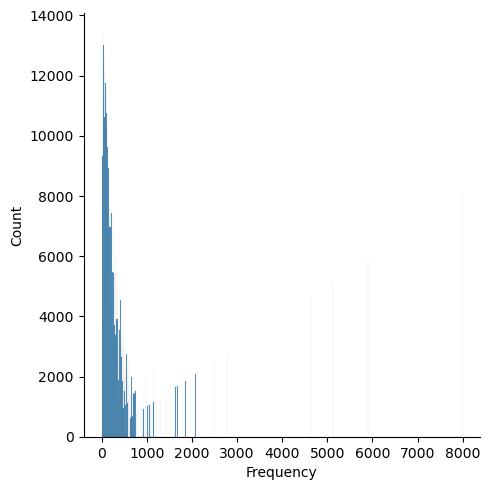

In [24]:
##visually represent outlier
sns.displot(cs_new['Frequency'])


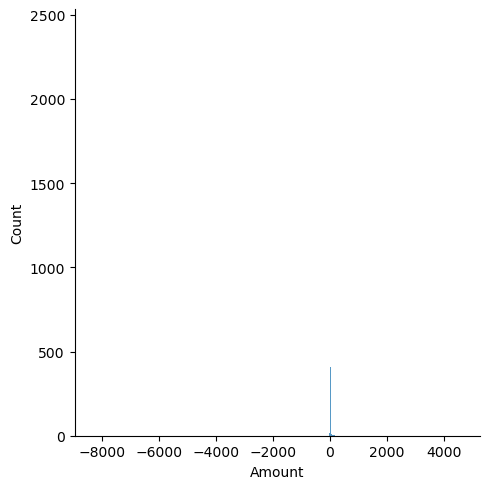

In [30]:
sns.displot(cs_new['Amount'].sample(30000, random_state=1))

In [36]:
#funciton to called the outlier 
def outliers(f, ft): 
    Q1 = f[ft].quantile(0.25)
    Q3 = f[ft].quantile(0.75)
    IQR = Q3 -Q1

    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5 *IQR
    ls = f[ (f[ft]< lower_bound) | (f[ft]> upper_bound)]

    return ls.index.tolist()


In [37]:
#create an empty list to store the output indices from multiple columns 
index_list = []
for features in ['Frequency', 'Amount']:
    index_list.extend(outliers(cs_new, features)) #we want to save the index list in the same list therefore I am using extend fucntion
print(index_list)

[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 154, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 1015, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1440, 1441, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905

In [38]:
#function called remove which returns a clean dataframe without outliers
def remove(f, ls):
    ls = sorted(set(ls))
    f = f.drop(ls)
    return f

In [39]:
cs_cleaned = remove(cs_new, index_list)

In [40]:
cs_cleaned.shape

(328433, 5)

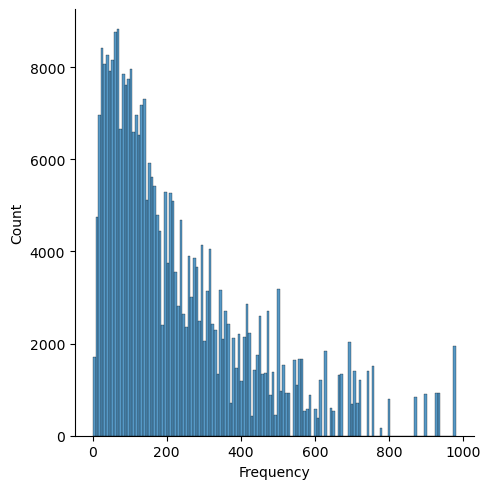

In [41]:
sns.displot(cs_cleaned['Frequency'])

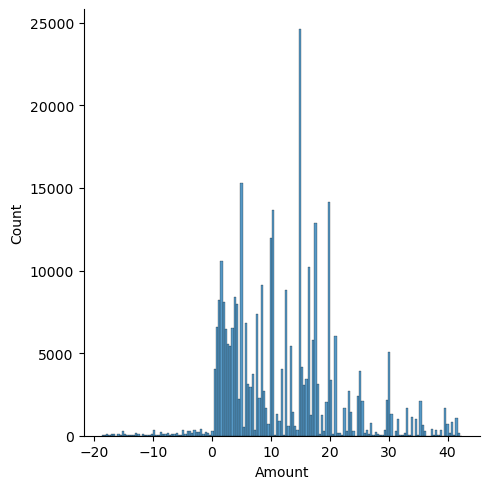

In [42]:
sns.displot(cs_cleaned['Amount'])

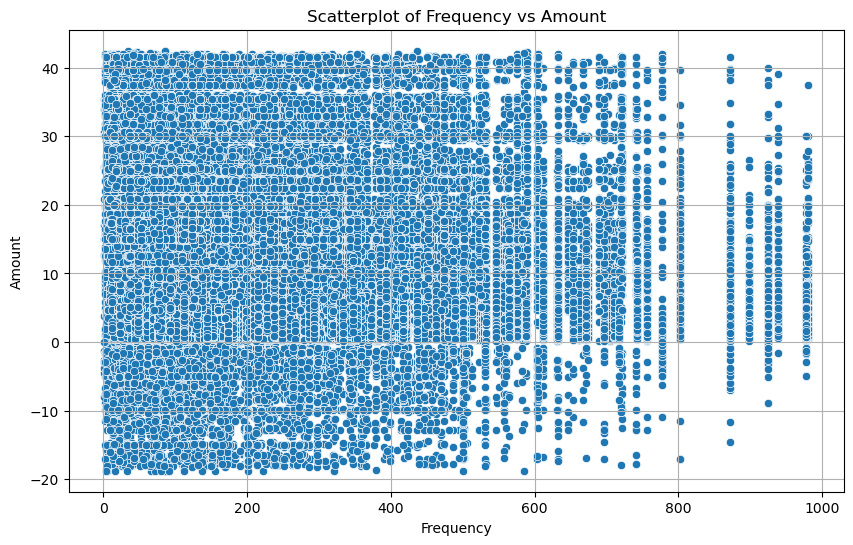

In [43]:
#Create a scatterplot showing Frequency and Amount
plt.figure(figsize=(10,6))
sns.scatterplot(data = cs_cleaned, x = 'Frequency', y= 'Amount')
plt.title('Scatterplot of Frequency vs Amount')
plt.xlabel('Frequency')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [45]:
#kmeans clustering 
from sklearn.cluster import KMeans

In [61]:
x = cs_new[['Frequency','Amount', 'Recency']]

In [63]:
k =[]

In [62]:
for i in range (2, 32): #as we dont know
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state= 0)
    kmeans.fit(x)
   

In [64]:
k.append(kmeans.inertia_) 

In [ ]:
plt.plot(range(2, 32), k, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()